# PUBG

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

pubg = pd.read_csv('PUBG6667.csv')
pubg.head()

,Unnamed: 0,Author Name,Review Date,Reviewer Ratings,Likes,Review Body,Developer Reply
0,1,大啊狄,2019年6月1日,1,2,不是讓我卡就是當機跟電音 還有一個是每次要打人或不打人的時候就自己轉向另一個方向 可以請問...,HotCool Game2019年6月1日親愛的玩家，很抱歉讓你遇到這樣的狀況！我們很樂意為...
1,2,指心,2019年4月20日,3,303,這遊戲出了有點小頓 其他都還可以 但如果有台灣旗幟的話可能會比較能更好 還有東西越買越貴真...,HotCool Game2019年4月26日親愛的玩家，您好!\r\n\r\n感謝您對《絕地...
2,3,奈緒Nasu,2019年6月2日,2,67,玩起來還可以 就是很該死的耗電量超大，然後有時候玩到一半會卡一下，而且講真的台灣國籍在哪，...,NaN
3,4,石邱氏,2019年4月20日,5,721,我找不到我們國家的國旗 按搜尋也沒有 是紅色的 左上角是藍白色的 它代表著青天白日滿地紅 ...,NaN
4,5,Jean Wu,2019年4月20日,2,437,我一直連不上伺服器 這是bug吧！請改善 謝謝 還有放上台灣國旗 謝謝 並打 Taiwan...,NaN


In [19]:
import jieba
import codecs
from wordcloud import WordCloud
import os
import re
from collections import Counter
jieba.set_dictionary('dict.txt.big') ##繁體中文字典
jieba.load_userdict("mydict.txt") ##自定義辭庫
with open('stops.txt', 'r', encoding='utf8') as stopText: ##停用字
    stops = stopText.read().split('\n')

AllReview = ""
for i in range(len(pubg)):
    AllReview += pubg.loc[i,'Review Body']
#print(AllReview)

Building prefix dict from C:\Users\侑均\CS-X 資料科學程式設計\APP回饋分析\dict.txt.big ...
Loading model from cache C:\Users\侑均\AppData\Local\Temp\jieba.u8e667925d1f618679f893456b9f6048a.cache
Loading model cost 1.873 seconds.
Prefix dict has been built succesfully.


In [20]:
import jieba.analyse
keyWord = jieba.analyse.extract_tags(AllReview, 10,withWeight=False)
print(keyWord)

['台灣', '國旗', '遊戲', '好玩', '沒有', '什麼', '下載', '爛爛', '臺灣', '你們']


In [21]:
# terms = [t for t in jieba.cut(AllReview, cut_all=True) if t not in stops]
# sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

In [22]:
GroupByRating = pubg.groupby('Reviewer Ratings')
GroupByRating.size()

Reviewer Ratings
1    2926
2     303
3     494
4     472
5    2472
dtype: int64

In [23]:
rate = []
print("不同評分的關鍵字")
for i in range(5):
    review = ''
    for sentence in GroupByRating.get_group(i+1)["Review Body"]:
        review += sentence
    rate.append(review)
    print(i+1,jieba.analyse.extract_tags(rate[i], 10,withWeight=False))

不同評分的關鍵字
1 ['國旗', '台灣', '遊戲', '爛爛', '沒有', '下載', '什麼', '臺灣', '中華民國', '中國']
2 ['遊戲', '國旗', '台灣', '什麼', '沒有', '下載', '問題', '還有', '臺灣', '還是']
3 ['遊戲', '台灣', '國旗', '什麼', '沒有', '你們', '我們', '問題', '下載', '好玩']
4 ['台灣', '遊戲', '國旗', '好玩', '不錯', '什麼', '問題', '希望', '我們', '有點']
5 ['好玩', '遊戲', '哈哈哈', '台灣', '國旗', '不錯', '這個', '沒有', '覺得', '啊啊啊']


1 星:


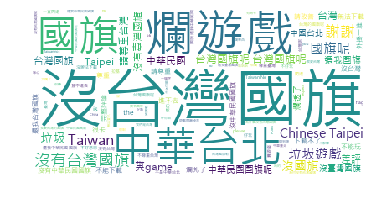

<Figure size 300000x100000 with 0 Axes>

2 星:


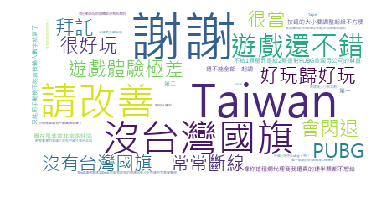

<Figure size 300000x100000 with 0 Axes>

3 星:


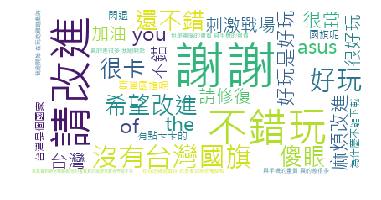

<Figure size 300000x100000 with 0 Axes>

4 星:


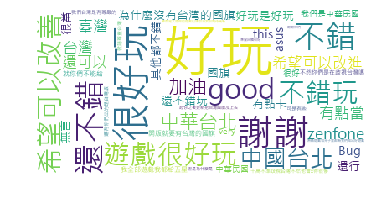

<Figure size 300000x100000 with 0 Axes>

5 星:


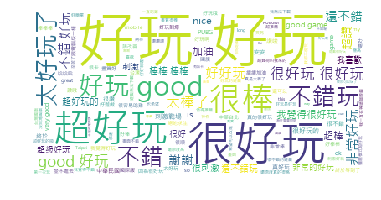

<Figure size 300000x100000 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [33]:
for i in range(5):
    print(i+1,'星:')
    wc = WordCloud(font_path=r'msjh.ttc',
                    background_color="white", #背景顏色
                   max_words = 500 , #文字雲顯示最大詞數
                   stopwords=stops) #停用字詞
    wc.generate(rate[i])
    # gcf: Get Current Figure
    fig = plt.gcf()
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(30,10), dpi = 10000)
    plt.show()
    plt.savefig('PUBG'+str(i+1)+'stars.png')

In [25]:
from snownlp import SnowNLP

pubg['sentiment'] = 0
for i in range(len(pubg)):
    s = SnowNLP(pubg.loc[i,'Review Body']) 
    print(s.sentiments)
    pubg.loc[i,'sentiment'] = s.sentiments

0.00658082515177294
0.030351453967756625
5.000292727541655e-06
0.0008845826432488657
2.6112986772908187e-07
1.7173342017340332e-06
1.0967382557680594e-10
2.9978121285134662e-05
0.09744659445048742
0.0787726242891652
1.1686602342964036e-05
0.16249761723194023
0.0017248749773417504
2.174545749056289e-05
1.8971207922380273e-06
0.0006273451548698405
1.6577123755912027e-06
5.127864761700351e-07
0.057522248141418264
0.0006089739225680901
0.00047858650675025594
0.22489472489001483
1.6644439049251503e-07
0.745084909906768
0.00018413409320994223
0.003442348136109219
7.135294495252964e-07
1.8231734384421827e-06
0.000217431804819479
0.2826446891282075
0.8304969159852925
0.00038596593343087626
3.277095084186499e-08
2.2284946542883155e-05
5.743038592465055e-07
2.732014146000772e-05
0.06309525728938925
3.0617763879803306e-09
0.010801616257493096
4.22515644693533e-07
0.0002590253968945966
5.996028518284735e-05
0.8608944250158358
0.0013534258560272683
0.0007853977062848294
3.358100409012188e-05
0.9309

0.060007570593634596
0.02613950043358637
0.0005418300623222239
0.5496667794921188
0.06710588194115141
0.09564398963881038
1.3548761346182658e-07
0.020170054701703966
5.535293868907942e-05
0.31610189403170474
5.405466669827774e-07
0.022367158406159438
2.932638198616111e-06
0.5372948774731409
0.0029270706244688416
0.9958305487376005
2.5242575281470003e-05
0.9523012110761021
0.8779864419748228
1.5073831354017742e-05
5.7014171161995364e-11
0.09580358033823466
6.628585356160954e-07
3.025908358356144e-05
0.8064961707535262
0.001254130130123543
0.9833448922330682
1.5512222717450896e-07
0.02641515800691996
0.0012540662720548212
4.617875347523448e-05
1.1501910535116622e-13
0.20126896010902862
1.6037114902722749e-06
0.1139662802024991
0.04974707578670656
4.559699454531607e-05
0.24336349499854026
0.9547831972524594
5.500044863993026e-13
0.005282217297254199
0.4687028860553848
0.0006706621760781406
0.24030382036450604
0.011565827065882162
0.00039226197263109164
0.000542776421733504
0.0022848335043

0.12917226414715566
0.9431885116380481
0.00037700105688198704
0.00782965571810268
0.4708777037365478
0.4781929086115899
0.9707115530079465
0.1575354807711994
0.23906388315821225
0.18792500428337988
0.052136421838821945
0.03374463068430067
0.6521663392972801
0.02970148283169871
0.9923688750219396
0.20685978310341213
0.00420768632634394
0.03561845468811553
0.006722920007002364
0.003995170585711194
0.0012309564155900121
0.9152626405031515
0.927840763945194
0.0009312058824361147
0.36300474532523186
0.12197612809780678
0.4921093020181776
0.04550075321450231
0.007925620371499909
0.7437381410911587
0.5047905415672483
0.01809572802420789
0.9916165054071939
0.009941967614434666
0.0002015989117826189
0.11612426879487192
0.19294102083691078
0.9313328608854125
0.805605361463282
0.9137493633995663
0.5537535441353489
0.0021298439086290255
0.9209394013916959
0.2168747072650451
0.12358343790560566
0.9115239634590717
0.05133614985841495
0.25570430140303224
0.03437949860066025
0.8625104051752224
0.01895

0.15004067661551468
0.4305632783722444
0.8067011580278768
0.4156974805959638
0.016290317563426693
0.3808035847849085
0.00993381094324941
0.04335367556416958
0.20487869597187502
0.9105199493565465
0.9534549739056842
0.14240222496971433
0.8822331418670126
0.9458450165842424
0.03578959506057722
0.028674147329615818
0.7461839070398073
0.722829803875574
0.05116652413708789
0.05325026285649026
0.06492054077316489
0.9497483400304745
0.00036870897880836306
0.04147985713058466
0.20712918284927384
0.5316539709893628
0.16276503254359254
0.39200389407023606
0.45077678037413116
0.5496373259126316
0.035428409119325543
0.8570984139812173
0.08112283992678804
0.9581616608988687
0.8456800546147493
0.03331704274243663
0.0232494221900591
0.37059696754941296
0.024375818609874034
0.2380195929377319
0.3071685435554061
0.010822082775437059
0.9165478495259337
0.0018804517218845573
0.7746168983337642
0.8844411282848745
0.5361060429329285
0.0008613048171232096
0.05545761387797743
0.041731870982160246
0.422710682

0.8041029829496121
0.3207031806322135
0.12615637908109723
0.11655901570888372
0.7970049925589682
0.37185004396894095
0.47629798174899396
0.20729124821614198
0.3327647235971659
0.6689400158195717
0.44536673479723154
0.2521583685494029
0.10357963306805329
0.9191980991744942
0.31465115924357434
0.6619851266900865
0.9340515215066444
0.5617879598760145
0.5840088013347784
0.06462755555490263
0.29559018282531935
0.07108394925315298
0.49182587986890014
0.8069713926047836
0.9565293629900987
0.5963181017462155
0.5140827911903408
0.6835365894385488
0.9776287207447234
0.7589766800090721
0.4993463102001938
0.255560802891068
0.13765457469129982
0.6582012684079007
0.22881562326554106
0.8429853195175616
0.8024229328483407
0.3683747528819302
0.10537434674057433
0.7843884224463364
0.05075851170395895
0.9759209189602686
0.05622001203211213
0.032681398287253915
0.35040446460459007
0.1595702660724495
0.5294947133879224
0.6764697085861687
0.3746061971972232
0.13528603566062014
0.9096061842393064
0.447678458

0.11173287600515724
0.1223456157118995
0.7242950344992851
0.14626521867225095
0.4869103343988235
0.0521465462019336
0.029138997333752914
9.769785321855906e-07
0.010355826319875638
0.8986342467895602
0.8535997309966903
0.18494535664882827
0.4876880996205468
0.2683489520742207
0.78263888350519
0.18932280675481472
0.11574841800536695
0.011640722653443847
0.5709434084294102
0.5850491903949113
0.9265502823436659
0.8591997500764751
0.23668327964795466
0.42791196148101796
0.0005631926257696485
0.424287001840675
0.011463339594578459
0.2955501239386682
0.1081722988379189
0.026091552575450372
0.07744036803560439
0.9148758831711347
0.0013322693220481074
0.015414770274592926
0.08676807170617173
0.642261306608414
0.061309615396881845
0.4250086398650246
0.014355154358683397
0.00041080664767378927
0.7490830447170498
0.003423307285991495
0.28773232169663554
0.14714545872073626
0.174501754324221
0.5167644668185445
0.4205767469785082
4.6602766864412004e-05
0.8913323367602498
0.6973628968365676
0.2890754

0.5932637169277755
0.40262644999604347
0.06390464275927732
0.7805781640980098
0.25755902661354635
0.5175767433262147
0.8522377757953535
0.3104160936911723
3.6544594017584586e-09
0.8381525613131346
0.17201585158620336
0.5069870909782147
0.9735257489354969
0.6361451324675278
0.6161742298360058
0.023430087350207573
0.09398768194482587
0.254530759670756
0.8600519526100141
0.08038531340516952
0.4737672181921908
0.9144520446669456
0.5593235373520512
0.015338080233150198
0.005146160681093415
0.8055102619604888
0.7889528836593197
0.9812990701383076
0.7942816952352101
0.23183231486921863
0.8363780746166227
0.890142453148024
0.3398216573888624
0.8835083948573225
0.49614622458775626
0.809315692587587
0.810208036117568
0.44767845850986676
0.46626288369152447
0.5167644668185445
0.1810682742705132
0.9823247349035701
0.31465115924357434
0.421874597530976
0.44979079139425593
0.6377888257712762
0.5
0.7337098801234762
0.7559287896978777
0.05832515851933617
0.649551071273559
0.2653312141774915
0.63902434

0.7894736842105263
0.7894736842105263
0.5
0.5
0.5
0.7868518732840224
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.4737672181921908
0.9504950495049506
0.5397246978689613
0.1429697179916879
0.7894736842105263
0.864864864864865
0.44444444444444464
0.7795229979671993
0.864864864864865
0.5
0.864864864864865
0.7894736842105263
0.9504950495049506
0.23540065046524117
0.809315692587587
0.7894736842105263
0.5042906456488262
0.7894736842105263
0.5
0.5
0.864864864864865
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.9166666666666667
0.7894736842105263
0.8636363636363636
0.44444444444444464
0.5
0.864864864864865
0.5
0.8636363636363636
0.8999999999999999
0.7894736842105263
0.7894736842105263
0.5
0.7894736842105263
0.5714285714285716
0.864864864864865
0.7894736842105263
0.9005911035821151
0.19999999999999996
0.1429697179916879
0.5
0.7894736842105263
0.7894736842105263
0.5262327818078083
0.7894736842105263
0.9504950495049506
0.91666666666

0.003770616689925843
0.0021007025699867343
0.00277448038560979
0.0003107106542482585
0.02068862112631653
0.4260816840320676
2.6083540193289068e-06
0.0755873526412697
0.0009377148952809389
0.1419322131212326
0.0013229749278772518
0.7889417041879114
0.00013357709002337348
5.926532918532068e-06
0.0005988873671934902
0.0005184856973852181
0.2068486995997566
0.6398965972762896
3.258106512338266e-05
0.3181649517516564
4.6171557688268194e-09
1.2001134500616573e-06
0.5868130264652773
0.00033294713807108245
2.9065673279315973e-06
0.00013237474114680126
0.0001324427587348076
0.9951626190471156
6.752733583414994e-08
0.004599601841286272
9.993884639147854e-05
0.000493751458361058
0.051780499936651236
0.4862215491986801
0.05202078618184447
0.10414301888155608
2.4089775163549376e-07
5.823904966106852e-05
0.013243470021222725
8.50447200784199e-06
2.8067598978331887e-07
0.00016739800429277363
0.0019291675038117795
0.3713709296873837
0.00025849604750982635
4.752913983163687e-06
0.3132690278743102
1.024

0.108068207068312
0.9356462390635669
0.696423797050085
0.0018793033548029081
0.8467652384282994
0.7041766151570221
0.9361881857539707
0.015924177714190968
0.22929935273041335
0.0752520239667529
0.896120368352603
0.674258057529945
0.045662083635886974
0.5058111317677022
0.753481658288892
0.8703759524071087
0.4869802132014581
0.0014546403927780949
0.682143843500925
0.9994110214941865
3.582032957039072e-05
0.007867858070524258
0.0061998485806882275
0.34205052240742684
0.013766149940080075
0.22809478187419008
0.014721139225640001
0.5133596837793799
0.8733049163828728
0.26128095150853925
0.16085781345417394
0.0731049553378238
0.0007198370703228596
0.9654859016989144
0.8406971101963658
0.0820493874908722
0.16487971138477198
0.0020956306779067457
0.04419505099388421
0.0010263833541033218
0.04853441237593348
0.14701724703488683
0.10655252611211696
0.927737631935489
0.9999430325705557
0.3798735635365148
0.0021549331404440153
0.23010041189181107
0.994250866927607
0.10224031816382972
0.4048635705

0.002904495548724295
0.9930581096603506
0.33621886627467745
0.09939912006637852
0.04057246063903519
0.4754289413227609
0.2253588324646295
0.8008223854997306
0.9167711581138167
0.02611201553147313
0.42608315203845737
0.17849073045482322
0.0009939280621532598
0.016493512897483686
0.08042505483929319
0.17111606348899522
0.7172771183194905
0.2760863746728681
0.05459870600634009
0.009298221307914134
0.013897724299315461
0.17048784839001274
0.3374643546249133
0.9855970877682464
0.5476517167966034
0.8367268472977836
0.6594552762664961
0.9986190105241727
0.032681398287253915
0.3797104371277026
0.6339981869041772
0.6063972717011407
0.7949562525204448
0.25082598793340694
0.6149493913573877
0.8668111293858813
0.05086009911783074
0.5566363896128443
0.1989229994766104
0.005741676119064731
0.039074453804843756
0.5589747627935717
0.23854697034037253
0.018486011173119543
0.5114656880071478
0.05406005906064115
0.10959323277965927
0.7851404790340248
0.9788529671716721
0.7615421607694985
0.27104157436762

0.533500267048378
0.1354749808484188
0.06544133293077103
0.5
0.7887389939374866
0.9193896722308924
0.06796405105769099
0.09236941933659326
3.635002787660824e-08
0.28462060103577014
0.385174681551793
0.11954745205152528
0.23082833962758653
0.6404483132097064
0.11053312581361419
0.19047244094150195
0.3294614659602063
0.9193432120627855
0.8654879391484723
0.20834887880320452
0.4737672181921908
0.32561300722990305
0.5
0.5957486157048995
0.8918092077512473
0.011277783641473471
0.07285291990579879
0.21798288301633006
0.438315906139508
0.0007397770179312646
0.037894025252308894
0.025168695892203052
0.5405306905164671
0.17047234269101452
0.6202547529575092
0.04711530896163185
0.077480734007915
0.8029165535800625
0.5553782980688879
0.2565195655759035
0.5946023610620317
0.053490409382604964
0.02001977142386646
0.018019188852098744
0.805810152448146
0.9613383841420745
0.9551099739978949
0.7336933735530834
0.799040242525978
0.2660673383883835
0.48094472651634745
0.08169578793947241
0.8138767260356

0.0
0.9453126197756838
0.9812990701383076
0.8990069701754381
0.15364799173769383
0.5915357306485564
0.12734510506229768
0.8743228454986135
0.9812990701383076
0.3650199306287688
0.15828672497160234
0.04600934197240014
0.7894736842105263
0.46626288369152447
0.9517876963631039
0.28444336510268187
0.5678127144574473
0.1583881665191068
0.5164300874754048
0.4737672181921908
0.06919416321224914
0.6284114660862231
0.8477695294967267
0.10640525383630162
0.34201049362690206
0.33520364676904535
0.012685537665910296
0.0052324982885151305
0.39929275840750367
0.4916590280903441
0.7687070917494024
0.18498179172786067
0.8707904206252594
0.6953086368045239
0.5
0.8042787057162896
0.44767845850986676
0.8743228454986135
0.4456531855192951
0.25173800375870103
0.4737672181921926
0.7499999999999999
0.8853478217433287
0.8109136772195031
0.16849244223532023
0.16849244223532023
0.40037463784600713
0.4456531855192951
0.8707904206252594
0.23082833962758653
0.32561300722990305
0.6478620470371438
0.0415600629121156

0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.9504950495049506
0.19999999999999996
0.5
0.6820106287554023
0.7894736842105263
0.44444444444444464
0.1837233963534416
0.5
0.9504950495049506
0.7894736842105263
0.7894736842105263
0.5262327818078083
0.7894736842105263
0.8636363636363636
0.44444444444444464
0.9504950495049506
0.5
0.6558628208940429
0.8999999999999999
0.5
0.5
0.5042906456488262
0.1429697179916879
0.7894736842105263
0.7894736842105263
0.6558628208940429
0.19999999999999996
0.6820106287554023
0.7894736842105263
0.8999999999999999
0.5555555555555558
0.5
0.7894736842105263
0.7894736842105263
0.19999999999999996
0.5
0.44444444444444464
0.7894736842105263
0.8999999999999999
0.5
0.5
0.7894736842105263
0.19999999999999996
0.7894736842105263
0.5
0.5
0.7894736842105263
0.44444444444444464
0.864864864864865
0.7868518732840224
0.7894736842105263
0.7894736842105263
0.8999999999999999
0.864864864864865
0.7894736842105263
0.19960972969384783
0.1429697179916879

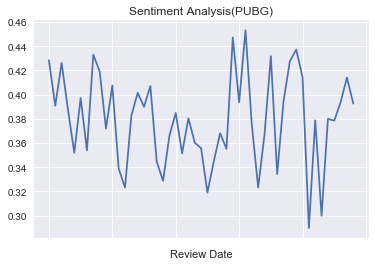

In [42]:
GroupByTime = pubg.groupby('Review Date')
GroupByTime['sentiment'].mean().plot(title = 'Sentiment Analysis(PUBG)')
plt.savefig('PUBG sentiment')

# AoV

In [35]:
AoV = pd.read_csv('AoV17200.csv')
AoV.head()

,Unnamed: 0,Author Name,Review Date,Reviewer Ratings,Likes,Review Body,Developer Reply
0,1,Hank Cheng,2019年5月27日,1,7,檢舉系統差真的是有目共睹，一個人整場掛在溫泉沒輸出也沒承傷居然還有評分？這系統根本就是幫多...,NaN
1,2,隆挑戰無片五千訂閱,2019年5月28日,1,45,嗎的一進到戰場就退一直退？？傻眼欸到底怎魔處理啦遊戲越做越爛…拜託好好改進好嗎而且網路明明...,NaN
2,3,偉民,2019年5月26日,2,3,打排位遇到掛機還是連續3場!扣積分不多就算了補償還那麼少希望可以補星,NaN
3,4,申彗星,2019年6月1日,5,89,可以不要這麼爛嗎 大更新之後每一場都卡 高清有的沒的都調到最低了 網路也很好卻卡到連走位都...,NaN
4,5,卓你立洋,2019年5月23日,1,5,為什麼改版完遊戲變的很卡 網路明明就很好，一直跳紅色 卡到不行 有沒有人也有這樣的問題,NaN


In [36]:
GroupByRating2 = AoV.groupby('Reviewer Ratings')
GroupByRating2.size()

Reviewer Ratings
1    7563
2     939
3    1419
4    1276
5    6003
dtype: int64

In [37]:
rate2 = []
print("不同評分的關鍵字")
for i in range(5):
    review = ''
    for sentence in GroupByRating2.get_group(i+1)["Review Body"]:
        review += sentence
    rate2.append(review)
    print(i+1,jieba.analyse.extract_tags(rate2[i], 10,withWeight=False))

不同評分的關鍵字
1 ['遊戲', '檢舉', '什麼', '隊友', '你們', '網路', '問題', '爛爛', '系統', '一直']
2 ['遊戲', '什麼', '檢舉', '網路', '問題', '隊友', '閃退', '更新', '然後', '進去']
3 ['遊戲', '什麼', '網路', '隊友', '問題', '檢舉', '更新', '閃退', '傳說', '排位']
4 ['遊戲', '好玩', '不錯', '什麼', '問題', '隊友', '網路', '希望', '更新', '可以']
5 ['好玩', '遊戲', '安安', '好好', '傳說', '不錯', '什麼', '可以', '覺得', '希望']


1 星:


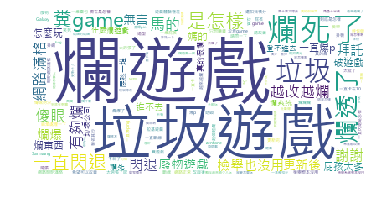

<Figure size 300000x100000 with 0 Axes>

2 星:


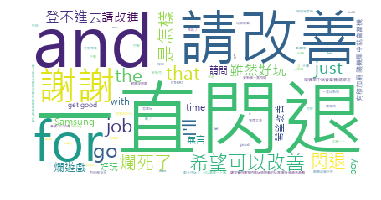

<Figure size 300000x100000 with 0 Axes>

3 星:


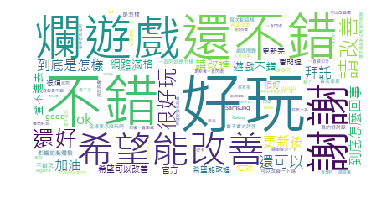

<Figure size 300000x100000 with 0 Axes>

4 星:


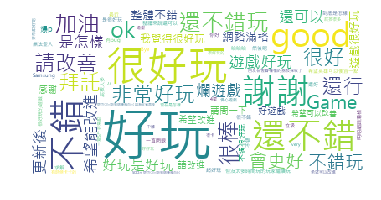

<Figure size 300000x100000 with 0 Axes>

5 星:


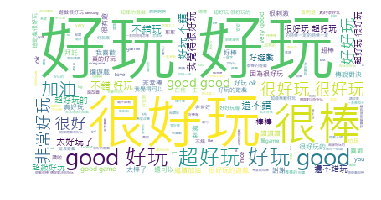

<Figure size 300000x100000 with 0 Axes>

In [38]:
for i in range(5):
    print(i+1,'星:')
    wc = WordCloud(font_path=r'msjh.ttc',
                    background_color="white", #背景顏色
                   max_words = 200 , #文字雲顯示最大詞數
                   stopwords=stops) #停用字詞
    wc.generate(rate2[i])
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(30,10), dpi = 10000)
    plt.show()

In [39]:
AoV['sentiment'] = 0
for i in range(len(AoV)):
    s = SnowNLP(AoV.loc[i,'Review Body']) 
    print(s.sentiments)
    AoV.loc[i,'sentiment'] = s.sentiments

0.010950942600101543
1.002923555759594e-06
0.008082217528863178
0.01564559168024149
4.126199284359977e-06
0.0004552723212960519
4.5372043566693776e-08
0.6316609002398303
0.0012020477888725623
3.0059635278800734e-05
0.0017501894263998174
0.0012040077327599708
3.049800458843066e-07
5.80082530885484e-05
5.106289430956146e-06
0.008670783914233371
0.012248033531010338
8.58952269822133e-06
0.000680632424743921
3.7511728160355418e-06
1.0053118337793876e-09
0.008852961606540366
0.0011180348568173848
0.0002077993531428568
0.00018912114644276112
0.3226253859693845
0.9722120195305953
5.999240348941726e-08
0.2022986394285483
2.0266891248565955e-06
0.00016792043830793357
0.009023672383299042
0.3524196720802114
3.6417908921837494e-07
0.7861359485074366
3.7864278834232046e-05
1.7228583559791844e-08
0.3889919254679558
0.9992371509785379
5.669412651010397e-06
0.015025081324531286
0.0012152211242589805
0.0008777161392963251
6.134433783167026e-08
0.00011986693140630944
2.9385562871908633e-09
0.0003227576

0.0002199569544453217
0.003200866839178085
1.1880354366944346e-08
7.92756200360678e-05
8.838254406795532e-05
0.003157886421645828
0.5373262861909575
0.22299154002401944
0.004127791185156049
0.995915130379234
1.5641215276307463e-06
0.01309611984720127
0.0029375096215463747
0.002018677061427554
0.02933172744974688
0.06033493785616517
0.1065482496289214
0.011092930875516549
0.02088833074218266
0.029849148040506757
0.008913680386697376
0.09405287048968514
0.020539333225046308
3.225878553170247e-08
4.920875406377867e-06
0.0029514788667863723
6.294892776481653e-06
0.0017631457582218957
0.09010299690478552
0.6167081531323346
0.0058976726825425985
0.1772926487493296
0.0016740250704561088
0.0003926716363927829
0.0033682497210809625
0.12844450078146652
0.15208600667092909
0.0011270096167327326
0.008516690921398062
0.00014840756730816196
0.002484322971905484
2.0192736371882347e-12
1.2828763717998015e-08
0.0002670441819790925
0.0001722291825073663
0.9932334778787675
2.42207263341232e-05
0.14736483

1.5149041214912451e-05
0.021416635000815365
0.0017164741108076642
0.113795023391567
0.21177180404555151
8.158931401602842e-07
0.00046518162874020774
0.001358455282967741
0.014374380497877981
0.030833517127969667
0.5167644668185445
0.06317541654173398
0.1511685250235697
0.6690458272206069
0.14961221087908105
0.0015165187717985917
0.005217435144655114
0.0007603115165808472
0.0008748177574238181
0.057477401691797714
0.022597585608189474
0.1165632803433968
0.00115268623566267
4.98813295113365e-08
0.0014828635177880356
0.09269110139867953
0.145895663093343
0.12404131276352859
9.710804780760363e-05
0.18440035753341244
0.0016452654018123125
0.6136649263679842
0.6184048252782297
0.01104097298210982
0.24776995068562613
0.0005533691641197436
0.047156901945664575
0.12336458615984314
0.7548228612903104
0.46971649730128007
0.22452074864088056
0.16196258371370464
0.019986824109975654
0.002584442574099177
0.012303011694182686
4.007927015603485e-06
0.16815268162628594
0.1178469334434622
0.033142327367

4.377506357400307e-09
0.6593210516265493
0.7507431595882452
0.8244503678656402
0.9735813379693528
0.986470222760046
0.42697919182046506
0.09214363494587718
0.8493712553908984
0.2783222182012185
0.2219665678785141
0.1679397796848876
0.5278295976225033
0.03944491034098929
0.49209420700091366
0.9419224632676213
0.05884287016917289
0.420121222412726
0.5841276052340301
0.4308058359652446
0.044809075599956616
0.3034564509959089
0.48043588264130566
0.08776156489455444
0.06973638928454395
0.02088835734133332
0.26886235615524623
0.214910004268141
0.4313086024983904
0.564167113040344
0.22965089460307853
0.27669974755339954
3.348762378507786e-09
0.533500267048378
0.5563042178649756
0.23531658850589499
0.009074257916216522
0.008917329643825966
0.8266432309858464
0.7370708841692452
0.09497801341191359
0.9272552507766608
0.028111697642366318
0.8224342475199602
0.2685431639173905
0.7765898161029464
0.15087740053210363
0.022772392764121685
0.25977256731868836
0.7942816952352106
0.07095885752456643
0.0

0.44444444444444464
0.19999999999999996
0.8636363636363636
0.7894736842105263
0.7894736842105263
0.5
0.19999999999999996
0.5
0.7894736842105263
0.7868518732840224
0.7894736842105263
0.19999999999999996
0.7894736842105263
0.5
0.5
0.19999999999999996
0.9005911035821151
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.5
0.7868518732840224
0.7894736842105263
0.6342546484425678
0.7894736842105263
0.5
0.5
0.8501598100548057
0.7894736842105263
0.7894736842105263
0.8636363636363636
0.9504950495049506
0.7894736842105263
0.864864864864865
0.7894736842105263
0.5357142857142855
0.7894736842105263
0.09093661119089869
0.7894736842105263
0.7894736842105263
0.19999999999999996
0.27500000000000024
0.7894736842105263
0.5
0.9504950495049506
0.8636363636363636
0.4737672181921908
0.5
0.19999999999999996
0.7894736842105263
0.7868518732840224
0.5
0.7894736842105263
0.7894736842105263
0.19999999999999996
0.6558628208940429
0.7894736842105263
0.5
0.9047619047619047
0.19999999999999996
0.7894736842105

2.1630727597976573e-06
0.006157838457454767
0.029179194759506144
0.0014071859337196901
7.386639898632197e-07
0.003186322071050074
0.0018425707056719531
0.0015058809448311727
1.0486038343304749e-05
0.7394603778138551
0.07480098210239061
0.006998431041781883
0.0012834527719040034
0.04789116359726697
0.5593567844301927
0.004035185855793322
0.9879921720260333
0.02514095233081881
3.590430004174472e-05
1.1912941761615947e-05
0.0061409308774798
1.6611156894441592e-12
0.5342196080408109
4.599769311031121e-05
0.020339921135874905
4.028677256240343e-07
0.6995653120935512
4.0571965532754106e-05
2.082135130976326e-09
0.0002961401047741896
4.551351081016897e-06
0.0008513034533498276
0.0007669871439655029
0.0005783718989785802
0.04956810223731378
0.0009806830688681156
0.04206053677063515
3.7083740993537617e-06
0.4137768541370296
0.899970040889811
2.0083710455809367e-05
0.8725596394226194
0.8094800986441154
0.0007308054414050247
0.00012290637300882423
0.0
0.06185546751237425
1.6676721703579034e-07
1.

0.18604713094643333
0.7380015636152423
4.957736722488448e-06
0.08488519405110351
0.0013658660573379056
0.6919914879175366
0.011333041322833082
0.01042092304859854
0.5671512493252413
0.011353756716520613
0.031169354785092196
0.11883787936019885
8.232269953689642e-05
0.002487816291485645
0.03553942835604951
0.14887391678929707
0.006467904512644895
0.0010570292573082174
0.34124831711127057
0.34253252697924474
0.0010316928056315344
0.002825579504126985
0.0004386981743139673
0.0014238081138076009
0.5054466216455886
5.948306198644282e-05
0.049602485846561684
0.02413621127373533
0.34426437957778133
0.31029543739839305
0.002338735742560605
6.0424332204434e-11
0.06407890180865572
0.8881679947979947
0.0023740635941711385
0.11541832074525704
0.07487992593629778
1.5715403456573185e-05
1.820537787033949e-05
0.030934415955695127
1.9761969838327786e-14
0.03149683955703153
0.014124054810204512
0.002643344179318552
0.0018569371865689854
0.000247274586946733
0.5640019537963051
0.010197138265975902
0.257

0.999999922333576
0.5705905399745557
0.6778754948934304
0.669472510385561
0.0008607422714939084
0.0014696190975690415
0.002368675116304453
0.0035444309002348184
0.21765648372177004
0.0023406426664153157
0.561518363536673
5.8217893856404856e-05
0.9137312840665751
0.7423458831251647
0.00017400668428646515
3.4781990808752106e-05
0.6551396495455744
0.05946312508969154
0.0018246287550004459
0.016002764609756137
0.00429247871759908
0.5
0.35537546714712953
0.8990706815278302
0.8449047837812214
0.04121837156935526
0.16930260420278576
0.4737672181921908
0.13127278582177782
0.7103170307289003
0.13949471482418563
0.2486684450312464
0.8283667458570911
0.1963609110254264
0.07281710014907539
0.05202758894776527
0.05866155654853333
0.41929325112656235
0.37690251243345674
0.8971173724538661
0.0705819309516389
0.05529664456738226
0.47583194960152064
0.6147907769456661
0.09187588551290615
0.5051699757757675
0.002642913608817854
0.17682798317527204
0.07813443042206247
0.06978905339670305
0.87835920189119

0.01758524335490752
0.005759465841408518
0.6070326781070209
0.8059910967056291
0.2997304102210391
0.06934353044999231
0.518052771745225
0.23602781099350367
0.7201149382522442
0.5
0.5476643856714039
0.876918547952291
0.23129974206920556
0.9091957151771073
0.00019489464944733026
0.6221275238465152
0.2972858619480091
0.031906587772740025
0.37648904076929723
0.18117176802477641
0.9920316763405722
0.17105821794975118
8.899547765395255e-13
0.8307537039380013
0.5
0.2498403154850033
6.586575530875827e-05
0.008211758242002487
0.009930756398608631
0.5099952934542697
0.5267668338710972
0.6709737640176523
0.44920369340567345
0.9649967059383379
0.5545800674126663
0.009542221017595831
0.30887603853006473
0.3731921293317967
0.4338364992885614
0.06960526899140773
0.036031368365898264
0.04167949898809509
0.9268046788966571
0.028801051026987268
0.421874597530976
0.39649036561138595
0.9674205921677755
0.018972585036286405
0.0373185533269621
0.2858536569821415
0.9453126197756838
0.4821424451281966
1.87114

0.2511928529338049
0.421874597530976
0.7894736842105263
0.16849244223532023
0.6317853705682674
0.20704241118195832
0.8743228454986135
0.8059910967056291
0.3205815415310954
0.6250780319212258
0.16849244223532023
0.9101395937607051
0.8059910967056291
0.125
0.8743228454986135
0.3918292381677465
0.8743228454986135
0.16849244223532023
0.8743228454986135
0.8743228454986135
0.8654879391484723
0.11819048949597943
0.6864403227850091
0.4285714285714288
0.4737672181921908
0.7894736842105263
0.005340382688332368
0.8109136772195031
0.8743228454986135
0.6310003824401176
0.4010016307276185
0.41868568501062997
0.44444444444444464
0.6250780319212258
0.4140174397435631
0.9114640284716303
0.5
0.8743228454986135
0.41868568501062997
0.8109136772195031
0.5555555555555558
0.5771617483702034
0.8743228454986135
0.7894736842105263
0.41868568501062997
0.5
0.8743228454986135
0.8109136772195031
0.2927997833629108
0.8743228454986135
0.5
0.8853478217433287
0.9970879406640859
0.4279311989545127
0.6317853705682674
0.4

0.44444444444444464
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.44444444444444464
0.7894736842105263
0.12698412698412687
0.9504950495049506
0.5
0.7868518732840224
0.44444444444444464
0.5
0.5262327818078083
0.5
0.19999999999999996
0.8636363636363636
0.44444444444444464
0.5
0.5
0.5
0.7894736842105263
0.7894736842105263
0.5262327818078083
0.5262327818078083
0.864864864864865
0.5
0.7868518732840224
0.19999999999999996
0.7894736842105263
0.875
0.44444444444444464
0.7894736842105263
0.44444444444444464
0.864864864864865
0.5
0.5
0.19999999999999996
0.5
0.7894736842105263
0.5
0.8636363636363636
0.6558628208940429
0.7894736842105263
0.7894736842105263
0.5
0.7894736842105263
0.7894736842105263
0.9504950495049506
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.31469921568721015
0.7894736842105263
0.8636363636363636
0.19999999999999996
0.5
0.5
0.8946788391528524
0.9504950495049506
0.7894736842105263
0.15258541937922

4.260172742243107e-06
0.00392934076838114
3.393202462942391e-05
0.0001107660992938353
0.891609068846611
0.006636631676817051
0.2647087066413195
4.397766828478922e-08
0.011003717579118
3.321866142225183e-05
1.6137363367807467e-07
4.8594820326708366e-05
0.006429678785490167
6.515592059219699e-07
0.004443743113992316
0.0675392608939882
0.048113775691897565
8.064089804959984e-05
0.005666236294306515
3.126995242075381e-06
0.0022103138318864124
0.025970343891632774
5.376553281410956e-05
0.1276419226165023
1.474138344836895e-06
0.0007500868429984875
6.020907582127144e-05
9.978684545330907e-13
0.026602694245379754
0.008582790037295562
9.102303803243394e-06
0.02043713208251019
8.434615824226555e-06
0.22006685189334407
0.0006247423503086269
0.027358627519450174
0.014366887037667642
0.00022510744761217172
0.0007271645281939909
8.520911898701744e-05
0.00019080322195241806
0.00011786814469783025
1.386778668721611e-05
0.004005497540254699
0.0009985789515496446
0.00015506942927379086
1.87102553894646

0.6128239191458752
0.29145387228274755
0.012695007850465512
0.001770239971609966
0.49154398117224674
0.3736470994103359
0.1783538072396199
0.013646704959916267
0.001981072474642964
0.008134272479339621
0.3367185756453924
0.011110416635458753
0.04667291551324759
2.2290835843818968e-11
0.08054433521377613
0.15535021182976483
0.06557553331076427
0.3381301440625184
0.2958968341753224
0.16192556242593648
0.1679397796848876
0.23264236536931138
0.41338580411754555
0.01218916277638149
0.003576492149701904
0.2028264443703125
0.0353645847939239
0.0734816339352693
0.030251375048058415
0.020107371082292658
0.1800905717017488
0.02575847047091262
2.220446049250313e-16
3.1530333899354446e-14
0.9850943459947217
0.8902502876629627
0.5884720368631601
0.12772338106011627
0.0070063934284456675
0.02314283011057494
0.017655216799108864
0.02463380293309736
0.5855528042034474
0.7710259785055829
3.1115766739198136e-05
0.11163107293253316
0.00599945432017901
0.0069497199375231355
0.7239102883672318
0.6539504213

0.03805987228220531
0.03805987228220531
0.0
0.17057005929922253
9.78666037099174e-11
0.4737672181921908
9.931038214006094e-10
0.645221136083885
0.34255914223531925
0.8743228454986135
0.15177752348419515
0.9996508501646874
0.16644721497364445
0.6662647735600044
0.8716078437091744
0.42100461833344716
0.518052771745225
0.6963068480391368
0.1810682742705132
0.7382261216361924
0.421874597530976
0.5927343633786669
0.00043505159712464714
0.017668891078245763
0.16849244223532023
0.4456531855192951
0.14583840382938562
0.3205815415310954
0.41868568501062997
0.6250780319212258
0.8059910967056291
0.15258541937922643
0.5379242184612295
0.6250780319212258
0.8743228454986135
0.741318670247764
0.16849244223532023
0.7795229979671993
0.09897439489327131
0.8743228454986135
0.22336781321317445
0.3732031098678573
0.5
0.8010884477877822
0.421874597530976
0.1810682742705132
0.8109136772195031
0.16849244223532023
0.8109136772195031
0.421874597530976
0.8743228454986135
0.5555555555555558
0.8713226987197761
0.8

0.00010148907047113909
0.22175857700153423
2.684275024478211e-11
9.708514808748347e-06
0.00025652970812428677
0.9696983388315655
0.30813536671571906
0.49405451570860204
0.0205847209980784
0.017240128228964258
0.0010584006074525476
0.32959058524996376
0.00013444330490930412
6.1648445351947245e-06
0.020730203647437828
0.0020065631810385343
0.005138568584347913
0.8266064624286945
1.1733725102658354e-11
0.26987377180033534
0.16861777825227264
1.1176217192820914e-06
1.1299955049115518e-05
0.22442486340500034
1.7890496817329904e-07
0.035551358219998774
2.1569323379599936e-06
0.003983242715689395
0.0012811666633921748
0.000913665932290364
5.8575516742820355e-05
0.000357381572660076
3.9418050734596477e-07
0.47859794126099964
0.6157258397514864
0.02401199731772996
0.11362285061244548
0.004117241215381928
4.2065468300878095e-06
0.15627223492568487
5.906387437359939e-06
6.82039069455076e-06
4.053090619882127e-05
0.008908726009511092
0.0032730686273451104
0.004194555594522864
0.0003483491115916504

0.00011402793703185754
0.0010373503834746334
0.7890659467043681
0.41354173340083167
0.008162717308241918
0.0008815999275081365
0.012153528229246313
1.422635342862577e-10
0.004697648886849537
9.184376992121823e-05
0.0007046700760622304
0.21727719271255097
8.947731444663987e-12
0.0
2.194589399096003e-09
0.0013003101334869704
0.026644442723537387
5.3810448717994674e-06
0.0027154624077759815
0.1413842519015306
3.556912142821389e-06
0.0005133629008092777
0.09186629219509379
1.0551163590610813e-06
0.5690365470635877
0.0026036177729186205
0.013375323168938746
8.056063927064372e-08
0.012854118593330188
0.7340190602738156
0.09396567118511001
0.0009548774372351021
2.220446049250313e-16
2.298414961809936e-05
0.0007183899945999439
0.004685281443359668
0.00032846360188498736
0.42218887088945245
0.0029338834046440665
2.609549157839286e-05
2.2974483217086394e-05
1.2392755921242227e-05
0.0004478351362788846
0.007099448369975003
0.0002888864444129391
3.5219534580965828e-06
4.5757535782620096e-07
0.0063

0.6526920424952468
0.14900804874745155
0.3810319483137745
0.0015561483876533888
0.9059975193806459
0.11989817381902734
0.013503273878675559
2.4646602536648743e-09
1.504824580944586e-05
0.582647583704502
0.23115057895630065
0.2180826545005452
0.0030957107027421715
0.9059633976139184
0.001011512917875823
0.011077857314528705
0.018067257352185062
3.356984088553894e-05
0.06393308967598565
0.07324748227065558
0.0012585367991784224
0.041531726380574674
0.0002913293011457263
0.00344823188158927
0.00011975606479663892
0.02438344632522893
0.6312659048503954
0.5989060590316035
0.7898892308794284
5.29175252493852e-05
0.02485929132488429
0.06561907888124208
0.00011088084715149549
0.9863697735979317
0.0012067966050249845
0.08046277419032977
0.0024242445409246027
0.008493768806619229
0.00042159462158430916
0.2068637556020877
0.2272769433954248
0.00011241172427833845
0.0016882989416222571
0.008543465344982404
0.001079761564000914
0.007582002763219964
1.1844763380119971e-06
2.571305390830503e-10
0.031

0.05106516237953529
0.0014862080711747216
0.8498642198858223
0.6835140810313605
0.9816274976794213
0.8257350878945826
0.6819890350711537
0.9933833138573954
0.020222940720342808
0.11871728298078676
0.0007921217157355054
0.8919629720786902
0.4606642950244252
0.026229439250044617
0.02518597710998083
0.055556825420767564
0.7627705383889172
0.7043456761908369
0.7778599826420852
0.7746749008451914
0.9779972883404282
0.0015016245567152087
0.06460087574275963
0.5802912867887717
0.6327462688131057
0.3232739333830037
0.38605062100057475
0.08735381146737575
0.46747115789678895
0.07671454284565293
0.046217061008071436
0.01110641574785598
0.5845998145294484
0.03594686681887749
0.9324552654036744
0.27447333336582536
0.08463829409657375
0.0984511341319132
0.4540690816590651
0.7796797443466017
0.27413329746895354
0.9981809021505549
0.04131940946178658
0.09414596487459836
0.545117492233661
0.7306984368834807
0.010203840890050997
0.9073273730211318
0.2537204655480334
0.4233871209571147
0.215739781094335

0.1595744769158407
0.11734156438789589
0.9796161467733158
0.002201503375016345
0.1573153821875587
0.9249641091450408
0.9315968461464277
0.42215247448492876
0.0010221735247279984
0.8346134534221114
0.03026566302835343
0.1469995847758847
0.38004298824211247
0.9135077750532632
0.1099130620983132
0.02379863512005498
0.011953363538579787
0.9790954252469363
0.5594166696193568
0.543529824918097
0.7576582807165841
0.045873883742613586
0.022141754678651426
0.18370171290079262
0.006366499202225873
0.25570245812476466
0.7010288346395458
0.3133328404832785
0.005685508736424039
0.14352389294306367
0.8911391889141836
0.2721874598384014
1.5171564260452186e-07
0.5372370413777722
0.020704745215080367
0.21535454674694365
0.18816383949297966
0.01089442143310837
0.6247530175328081
0.08465443693001373
0.030088642608185667
0.7085923308003611
0.47882469326530575
0.0010250006319639793
0.7107885487248662
0.02373983085483844
0.7868518732840224
0.029730721397600357
0.01076437288095311
0.5863300299445576
0.788225

0.9646858089689226
0.8153465663872895
0.007187986817254188
0.2529879219642932
0.23316032671792386
0.9996621711055289
0.628375217988126
0.2710960473822952
0.5
0.09016302958472555
0.5
3.149859260576093e-05
0.5698835897845417
0.7382261216361924
0.3147536003881033
0.06844840870211544
0.5555555555555558
9.424239166833104e-12
0.9989940239380248
0.09194846724575945
0.12464011824147603
0.8044060228349419
0.9234091173850727
0.9719051965424409
0.8889322493430372
0.00027707402004095716
0.13196462035788858
0.03822468990443095
0.5533326052820042
0.0
0.2520707533540666
0.914686034383449
0.05307538601986517
0.026377866184996712
0.06880957338933824
0.19114638624554492
0.12588964453271656
0.8115804973258062
0.9918408900393787
0.9578554039427292
0.0019407850611388167
0.2861269310544937
0.056641229505492
0.05790224426918811
0.421874597530976
0.9593473686498762
0.0030123075005740185
0.7494973322988572
6.482150372022488e-10
0.999315558514144
0.4737672181921908
0.3104160936911723
0.5294947133879224
0.991394

0.44444444444444464
0.7868518732840224
0.7894736842105263
0.37244510202187986
0.7894736842105263
0.7868518732840224
0.5
0.5
0.7894736842105263
0.5262327818078083
0.44444444444444464
0.7894736842105263
0.8636363636363636
0.5
0.7795229979671993
0.7894736842105263
0.19999999999999996
0.7894736842105263
0.5
0.44444444444444464
0.5
0.5
0.5
0.7795229979671993
0.7894736842105263
0.5
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7868518732840224
0.7894736842105263
0.7894736842105263
0.5
0.5262327818078083
0.5
0.19999999999999996
0.6558628208940429
0.7894736842105263
0.5
0.7868518732840224
0.7894736842105263
0.7894736842105263
0.5
0.7894736842105263
0.5
0.8636363636363636
0.7894736842105263
0.5
0.19999999999999996
0.7894736842105263
0.5
0.7894736842105263
0.44444444444444464
0.5
0.7894736842105263
0.7894736842105263
0.19999999999999996
0.7894736842105263
0.7894736842105263
0.44444444444444464
0.8636363636363636
0.4737672181921908
0.5
0.7894736842105263
0.7894736842105263
0.5
0.5
0.

0.09561320434661891
1.4200344248260777e-05
0.00035488956982487885
0.007441810216151978
4.8995097756687755e-08
0.03703636195011317
3.646810358137742e-07
5.609130653283501e-07
0.029505060059950905
0.17639105648173614
0.00019778906903067384
0.003109815030574614
0.0008431480421485782
0.6399369834388161
0.003930054674759043
1.7497675064426232e-07
1.3926593211976979e-10
1.4886597510255228e-08
0.7495581518653336
7.942917545911143e-09
0.002819479204692721
9.083233265716473e-05
0.013220844560296707
0.021970742583922398
3.4958806638396567e-07
0.001256756380232038
4.264094389805351e-06
0.010456546509085674
0.6309251462607006
0.0003818488386676533
1.4158663959817908e-05
0.006546361398873102
0.1947983839201638
0.0021459880212398863
2.010183179967928e-05
9.486362899102652e-06
0.0010659099128600413
5.835966354805766e-05
0.9993120106665427
0.1717849778823034
0.07592166869716899
0.7448634774262611
0.018677637408871184
0.00017452896458536316
0.08453702244248518
0.0017690186442309574
0.001424144414209904

0.002900576236861574
0.0008835074473363402
1.28387908748806e-07
0.01774040678280997
0.6385479764060509
0.01849339754441459
0.24284395224830158
0.007905609899076516
0.5714637826230553
0.4278833490394305
0.09788503891755052
0.0005127077991440299
0.4019575134919686
0.02967313315310316
0.45165655550710593
0.041042812369287196
0.9050284508715308
0.00025285187274193266
0.0026337026865695945
0.05644374441513378
1.6535259635963584e-05
0.043386881427975754
0.008686004310315854
0.09376035966395979
0.0003217651111256936
0.11311897302524698
0.3537795048056711
4.173390904615992e-05
0.07978386591785236
0.0020387819740501634
0.011326991857508406
0.768317679258658
0.031066295923965703
0.1703680702287621
0.3500002717883193
0.2868972679448901
0.21806437066875206
0.0001573307036669691
0.9688729807524017
0.9994722074346533
0.05799976414073538
0.07843597998931762
0.15139823935070773
0.004735620113878736
0.0008274110118028366
0.9968081526011326
0.017409651772135604
0.013748004858611385
1.9927677508135844e-0

0.7860621646274535
0.5401853653513898
0.23582818027475727
0.11882545991811877
0.027866046081021056
0.31051525981394
0.1582724851509535
0.4680455641806094
0.06863013098201431
0.583423882276556
0.024634823574102516
0.029423923872454738
0.016245649704202836
0.4577037990250056
0.058264341484753346
0.4667117567840602
0.9210791814267112
0.10505083157967288
0.12510751969231526
0.2567591971835693
0.724319952783618
0.2363248856311514
0.010400323117357946
0.10996730042559033
0.07346953061799066
0.05451439748741116
0.23425687732376876
0.31244183821896654
0.010867373798668423
0.09984463429911239
0.08632079374592594
0.59614830624798
0.8247901043340985
0.30818305655058975
0.8617963934657471
0.7665612189070139
0.23997280649135777
0.011778073750762674
0.1446278380221373
0.0035123405065186075
0.13385972031606608
0.487603305785124
0.9047619047619047
0.03075900014180455
0.12707018154249938
0.0019054093016049878
0.16491797379326023
0.07396848234133802
0.3036650617951885
0.3549932327692844
0.95753530386998

0.004817621089595381
0.009878038269998668
0.8377290413800317
0.018656438528113717
0.8005818233742377
0.44767845850986676
0.8075029387439869
0.5594098514355454
0.011974742951151418
0.1817703335257257
0.9780806893635617
0.2051150518946755
0.41730301466852093
0.19214890637073856
0.6874997719132466
0.04471939102812317
0.9319640852244411
0.9827645399696909
0.022103470953482196
0.348856855832005
0.6418960999108019
0.029345241864477623
0.7154907245396359
0.7894736842105263
0.06949811266374872
0.0885162669539461
0.070185934150085
0.23997280649135777
0.07219899677904085
0.1839221982867587
0.13424698981799243
0.0002152543879478941
0.24121409176267894
0.43534139231763946
0.2421957601408402
0.5256757419080317
0.2396442142469427
0.5593301286333053
0.32944315625967735
0.7731894321487323
0.7978411898299874
0.19318543274632283
0.16310084120945134
0.9553341186197174
0.44767845850986676
0.2552096151549894
0.7597399585275396
0.033647088029833516
0.7495634362025416
0.5044553472957408
0.303489721261187
0.1

0.11619615971799102
0.37165162461671686
0.1668859721917343
0.9586283012623927
0.22331512353947947
0.7525545388407162
0.005362823233167391
0.25210084033613434
0.8079778810497632
0.8294180555335533
0.19194517325101912
0.6033395787562655
0.1587329950361862
0.05020989806564424
0.29018231809201067
0.9121831753693285
0.5
0.7023380816974304
0.25926333829863235
0.9629354059256303
0.13121098313114332
0.666075307773296
0.08224653951165739
0.14514363991704138
0.9820589899886756
0.4737672181921908
0.16849244223532023
0.19920451512109305
0.11578971089300338
0.16565783467577333
0.890142453148024
0.2308283396275872
0.005352677051450483
0.9095718040116019
0.965603141708982
0.0452584488100215
0.5555555555555558
0.9308959847051077
0.31494063522225546
0.421874597530976
0.8654879391484723
0.5897927415936408
0.023706914971097337
0.01594496809670609
0.23082833962758653
0.752446040152213
0.421874597530976
0.5
0.6170754469021927
0.06327130524072389
0.22233817260826194
0.6509076587051643
0.8743228454986135
0.0

0.44444444444444464
0.6558628208940429
0.9047619047619047
0.838566002771668
0.5262327818078083
0.9504950495049506
0.5
0.7894736842105263
0.7894736842105263
0.78494623655914
0.5649484536082474
0.7894736842105263
0.7868518732840224
0.7868518732840224
0.5
0.5
0.12698412698412687
0.5262327818078083
0.7894736842105263
0.19999999999999996
0.9504950495049506
0.7894736842105263
0.7795229979671993
0.7868518732840224
0.19999999999999996
0.5
0.22659401970705062
0.9504950495049506
0.7894736842105263
0.5262327818078083
0.9504950495049506
0.20550622225045778
0.7795229979671993
0.7894736842105263
0.5
0.7894736842105263
0.19999999999999996
0.27500000000000024
0.7894736842105263
0.12698412698412687
0.7894736842105263
0.7868518732840224
0.7894736842105263
0.5262327818078083
0.7894736842105263
0.8636363636363636
0.7894736842105263
0.6558628208940429
0.7894736842105263
0.6558628208940429
0.7894736842105263
0.7894736842105263
0.7868518732840224
0.05122271017124369
0.7894736842105263
0.22659401970705062
0.8

0.054852655893718794
0.0
3.820601266824042e-05
0.2771247798995966
0.0
0.0
0.0
0.7942816952352106
0.5
0.5
0.002145557768943207
0.04525023829378727
0.9895481627058565
9.636966219706e-05
0.00034197005122738044
3.309464258194339e-09
0.004368187747456176
1.7800011575808128e-08
2.774908447467084e-07
0.001847779641469427
0.03125955967838834
0.0005302546588378254
3.657428034875565e-07
7.338811730539518e-07
1.7207714215539127e-05
0.00018107010230183906
0.9605976718769907
0.027082579514819516
0.006084836907819691
1.779331793017036e-09
4.809504913216855e-07
2.1920166230704474e-05
0.4817031452610572
5.179560047530174e-08
0.2650483558293055
0.25912024797236355
1.416467257220333e-05
7.1365232359177355e-06
0.0002938181461979994
0.00014982359915294285
1.2107496226376746e-05
0.0008007816757137354
2.3551931027654405e-06
1.7948860593142157e-05
0.00047172472396306286
1.3229900958644514e-05
0.0006378372968068868
0.0001303877699050382
0.0027589052531451497
4.733699393444368e-05
0.00011980366435349055
1.1418

4.493316555731486e-05
0.0031279197934364067
0.006324586695951817
0.0011453258401903366
1.0109048745543525e-05
7.673580981859551e-06
0.0004568541515818092
0.28535836027815786
0.00845289865885046
0.14940317561433125
8.29647461841887e-12
0.0008596452312379377
0.0014403225676247189
7.456440259345776e-06
2.2999896831521482e-07
9.101461021510104e-07
0.0017916517584334324
0.08343312393152369
0.04465883261995729
0.0002647278222720484
0.006313381690837172
3.964721884130995e-09
0.015871219240891188
0.9994816066680242
0.009417665146997711
0.8146894494487619
0.0851613212228135
0.7942853016592212
0.005343123050841836
0.3857955943149307
0.004624820231017179
1.5800048420722135e-06
2.889133376982045e-11
2.3492054040952226e-06
0.0006582228512629351
1.1027627868642753e-06
0.003142333631915628
2.6421948902899395e-05
0.19721557195846284
0.004362151403386916
0.06475505088689737
1.122500811512328e-05
0.0011149412367291722
0.4700410589897286
3.7842567968904284e-05
0.0015077666106383392
1.2937346305363917e-06

0.08992157838562664
0.010034710250818368
0.9171691187838666
0.00010337403726357053
9.22687481974549e-10
2.5170840967092545e-09
0.0006339718186740839
4.503948621503717e-06
0.0013082633318124426
0.04498700046379778
0.002618709054801105
6.569916637910733e-05
0.038202207860188686
8.871748090610865e-07
1.7470669355645896e-10
0.4610568996761988
3.4775256925190234e-06
0.058610648960335965
1.988311092437911e-05
0.0628189491607204
3.173280685497826e-05
0.021810854950816028
0.0015929506390393033
0.0007169166507998703
1.5661206835826391e-06
2.2478232608591497e-09
3.952393967665557e-14
0.0017023733125824947
0.00033466215796118526
0.000287942185989043
0.0033712928484112004
3.1542758827107775e-07
2.766654494390508e-08
0.19867382474868622
0.002062800858569247
0.015021774070117955
5.464766317242464e-08
9.531553324393371e-11
9.751878581776285e-05
0.07573970583320522
0.00011615326947378435
5.755367293858171e-10
0.011283256674278763
1.9482415680727172e-11
0.006843678179870527
2.1656106440337552e-06
2.366

0.00270327105627699
0.9953635223919197
5.3925580791869265e-06
0.011839137342220418
0.9875553572836183
0.7557382274771687
0.003813131465021824
0.0009657985394173618
5.753971040078909e-06
8.567248347779444e-05
0.9929625451382081
0.00013983984148835393
0.7262373641901938
0.21867615151311104
0.03438430208618293
0.66996567007062
0.00013853734789326388
4.6920245466708366e-12
0.021129855614755222
8.834649329569899e-05
0.017122675584099523
0.2312531496100575
0.0006405531274148446
0.04170009122409124
0.032656380605019186
0.008351554823666896
0.0003119736404052498
0.61062322851965
4.0608057028101996e-08
0.00012409015858672046
0.0030041168149467223
0.008810855483999291
0.00039838600832586835
0.9996261775906258
0.01775217468216783
0.00023843452097405127
0.208337606718757
1.7701491487054355e-06
0.0012155614847684237
0.276608644040487
0.792013280306149
0.21892508458019388
0.013012294313767825
0.0009251351288416254
2.3205535237824648e-07
0.4573381340338114
0.137512506316409
0.0008184745185003672
0.38

0.0012401328012083823
0.07912505345079579
0.9956151823419745
0.04872031994235371
0.11964901286632712
0.5029198719846176
0.9629230640332608
0.04859443960921439
0.010452331248103852
0.14914774750801418
0.9974186089229221
0.10625740276501028
0.0004354986918170267
0.9951459889911924
0.9200091357169048
0.16180382148063732
0.7516568727149666
2.362984696802073e-09
0.0002941897964862106
0.06699394657319224
0.010403740847542364
1.6209256159527285e-13
0.2979942023836524
1.837337466503719e-06
0.9809583454389098
0.6222057334347904
0.0036899622364271467
0.00044968062063766023
0.0021193295955083125
0.9547241650884022
0.021120679574127665
0.004550302891362712
0.032199454864816124
0.00015874449331809704
0.006067594381588104
3.446884999647182e-10
0.20027833272667128
0.14301928345719717
4.360576344453193e-09
0.078317926789918
0.10636460475070375
0.9509727813455641
0.0022927169695149408
0.9604644013308933
0.018848939063712433
0.3938748832170126
0.005809599302178614
0.5137859929919654
0.04374115891831387


0.04777130856483636
0.07601077482665297
0.17071284513690155
0.0637601811015498
0.09962564581580347
0.09612574214849645
0.0020635335331268267
0.01562575637851782
0.1732266075789003
0.12899452436006975
0.09821871325117504
0.01207944838990671
0.042896495563574555
0.1693461007154401
0.40266383736049505
0.40701245283688126
0.6545099664418664
0.5398345667982951
0.3563487956843028
0.4553813754728889
0.6896151256637152
0.2930684799816544
0.9730506886285674
0.14128615906128594
0.4588047392250598
0.9971113069937783
0.7243164104299651
0.08938225867339789
0.009285854194999277
0.11131076960587416
0.05518025828740514
0.2466882243341314
0.25624756185833664
0.5241280970031146
0.10188970226143523
0.4994358828183968
0.288183699997861
0.20377162963714923
0.04965647711976329
0.29588310974638954
0.0004939344556726954
0.0583426948522342
0.38765497372929136
0.16312602914858165
0.1735853574610403
0.36853682133486176
0.00332685517608744
0.012673015872425863
0.33338233865647027
0.11823100266291675
0.16683784856

0.7182201417970877
0.011124132725124025
0.9809735505389441
0.2161086369474977
0.9208339893080604
0.13983154915365248
0.5147021440208116
0.9507818465226066
0.9328876490955835
0.1966097667015777
0.7058867626171423
0.048981091470708615
0.5641103983281105
0.5522896654476158
0.5907343162786673
0.13155241469234913
0.9194114680425769
0.15680473649367566
0.09420325258498363
0.016785810445286375
0.06841886160583588
0.4778877574539908
0.6063438766840066
0.41857404208935567
0.15851861088875052
0.16363634970062646
0.6976583144592595
0.20731185871542412
0.1310918560176766
0.02608725869702544
0.250405954344162
0.07636673737527833
0.46320105632320707
0.12205804253896246
0.2927326714941827
0.04270665148039576
0.10718625015381089
0.11360588190134513
0.48585255148912576
0.6219432263403673
0.035095804800862385
0.03388185103456032
0.956316341925684
0.015720157886824015
0.6389143958100253
0.776151117229004
0.5762724187594008
0.669230024261504
0.04814154709841323
0.20836010614939393
0.3665173766232276
0.908

0.0
2.6645352591003757e-15
0.14474007620858897
0.0996169021573935
0.2240401258093787
0.2614248268640774
0.06297987380354919
0.046552393532633185
0.0787142891630701
0.0739665498548262
0.679067949948958
0.014691708118919622
0.11208580432643911
0.0162607064385073
0.8991024061617265
0.5046973807510204
0.15117235314726152
0.020461238379051894
0.009353257543383342
0.9999064104651889
0.9959815109017764
0.30270371874356905
0.7701765538283848
0.03564926436896787
0.33003032059475745
0.1535088387885588
0.2218332999319771
0.028483996434719105
0.0005793181713231732
0.10496744756001442
0.2124602134170781
0.00279029013726384
0.8587380414712886
0.06575405737614626
0.9867058647972522
0.3145747571142513
0.34690679283168036
0.9626437099528157
0.017102817811679993
9.897416219928346e-12
0.5780906434091684
0.48261474920923975
0.9515792377206161
0.7032800282685346
0.46627308277258406
0.014656857090832753
0.9788063789679105
0.19956323554574207
0.10090834637800217
0.14826390680536727
0.4089226978943945
0.08824

0.1802128495395371
0.10304493726828412
0.1333455232633306
0.35277775172314363
0.8195435469372653
0.2942775864520676
0.05202823011014879
0.25237307764296646
0.7200835180877861
0.6214538539264906
0.6214538539264906
0.8109136772195031
0.5
0.18432983307363093
0.7155845582860854
0.021262920561553544
0.03553161223189771
0.7156793213262541
0.011277704681552092
0.07215623771271795
0.015216843021473414
0.7857004525428399
0.01636299986547607
0.0379020516170272
0.1949200009396732
0.8743228454986135
0.040450501639078706
0.9938464383719909
0.11376699996012474
0.02472299353041496
0.015536677341775329
0.7310861092108051
0.0639854352608894
0.06449309721632002
0.1372900036459549
0.18586669965395985
0.1276322506673384
0.0004419994420034046
0.27281107447078257
0.9532948623908633
0.0012846330728898403
0.1708059279395694
0.045847139367899414
0.10370114797495866
0.9317407894352411
0.03074242134739169
0.421874597530976
0.011931301009283857
0.7045628721688915
0.3319490314885568
0.17185038459419333
0.877223305

0.5228655902103306
0.9929108801953411
0.18667760499266683
0.8361290883344119
0.3537114131661251
0.9674205921677755
0.5153618819552878
0.021536870942172825
0.20236978518722404
0.08778229925733538
0.8740194013218742
0.3662310045916364
0.5426810537227948
0.9562260881557237
0.8623213650677157
0.1837233963534416
0.6485742200429128
0.9915460466020152
0.9920186633166869
0.97533770541223
0.6256009006510694
0.7476641514552627
0.9351086170821755
0.5084231222263609
0.3560302748353643
0.14208407256754807
0.09897603056771065
0.3485149699011958
0.3469876833240333
0.5
0.18462476771559477
0.5
0.9999737220112112
0.7894736842105263
0.9642300090178295
0.35072516527653985
0.08054142944961473
0.13210125867659928
0.00360700517464263
0.9969959729506049
0.00027375917672600725
0.045722407369618634
0.44500032116962174
0.0387610754078106
0.5972229501044357
0.5262327818078083
0.652655643035195
0.163221817913502
0.27554191136412154
0.01904111033421818
0.8853478217433287
0.03026521691349715
0.2942775864520676
0.032

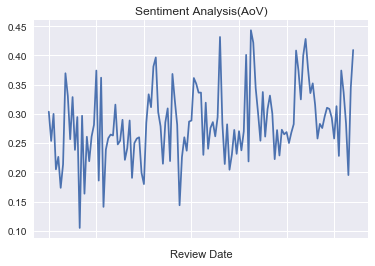

In [41]:
GroupByTime2 = AoV.groupby('Review Date')
GroupByTime2['sentiment'].mean().plot(title = 'Sentiment Analysis(AoV)')
plt.savefig('AoV sentiment')